<a href="https://colab.research.google.com/github/sada1908/edyoda_mldl/blob/main/ML_Pipeline_Assign01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Building Your First ML Pipeline with Scikit-learn

## Scenario
Build a pipeline to predict heart disease likelihood using age, blood pressure, and cholesterol levels.

## Step 1: Load and Explore the Data

In [1]:
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
# Simulate patient data
X, y = make_classification(n_samples=500, n_features=3, n_informative=3,
                           n_redundant=0, n_classes=2, random_state=42)
df = pd.DataFrame(X, columns=['age', 'blood_pressure', 'cholesterol'])
df['target'] = y

In [3]:
df.head()

,age,blood_pressure,cholesterol,target
0,-0.700467,-0.591764,-1.670430,0
1,-0.792493,-1.280908,0.654579,0
2,1.143962,1.398934,3.058842,1
3,-0.843922,-0.968257,-1.908295,0
4,-0.833106,-0.257403,-1.944526,0


## Step 2: Preprocess the Data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [5]:
X = df.drop('target', axis=1)
y = df['target']

num_features = X.columns.tolist()
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_features)
])

## Step 3: Train the Model with a Pipeline

In [6]:
from sklearn.linear_model import LogisticRegression

clf = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'blood_pressure',
                                                   'cholesterol'])])),
                ('classifier', LogisticRegression())])

## Step 4: Evaluate the Model

Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        50
           1       0.88      0.88      0.88        50

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



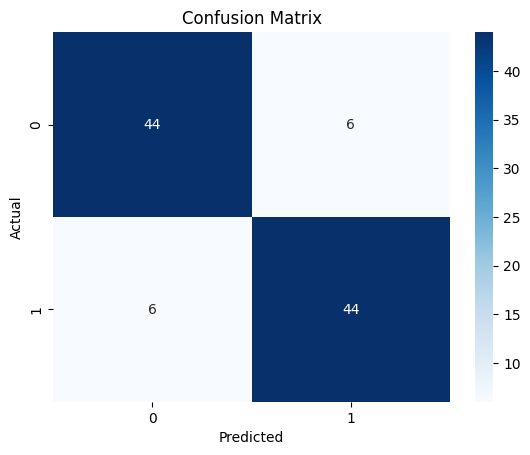

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusion
The ML pipeline handles preprocessing, model training, and evaluation effectively. Logistic regression performs reasonably well for binary classification with standardized numeric features.